In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.1


In [3]:
allel.vcf_to_hdf5('/wrk/Gen_Tree/GenTree_Genome_mapping/Fagus/Fsylvatica_GM_Oulu_filtered_v2._RENAMED.vcf', '/wrk/Gen_Tree/GenTree_Genome_mapping/Fagus/Fsylvatica_GM_Oulu_filtered_v2_RENAMED.h5', fields='*', overwrite=True)

In [5]:
callset_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Fagus/Fsylvatica_GM_Oulu_filtered_v2_RENAMED.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "Fsylvatica_GM_Oulu_filtered_v2_RENAMED.h5" (mode r)>

In [6]:
sorted(callset.keys())

['calldata', 'samples', 'variants']

In [8]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT','DP', 'QUAL', 'AN', 'MQ', 'QD', 'SOR', 'MQRankSum', 'ReadPosRankSum', 'numalt'])
variants

<VariantChunkedTable shape=(483348,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QUAL', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('QD', '<f4'), ('SOR', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4'), ('numalt', '<i4')]
   nbytes=33.2M cbytes=12.4M cratio=2.7
   values=h5py._hl.group.Group>

In [9]:
callset['samples']

<HDF5 dataset "samples": shape (686,), type "|O">

In [10]:
def plot_variant_hist(f, bins=30):
    x = variants[f][:]
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

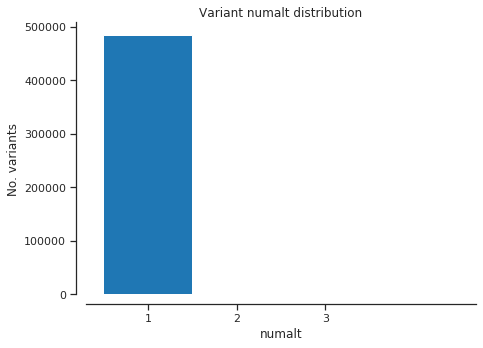

In [11]:
plot_variant_hist('numalt', bins=np.arange(0.5, 5.5, 1))
plt.gca().set_xticks([1,2,3])

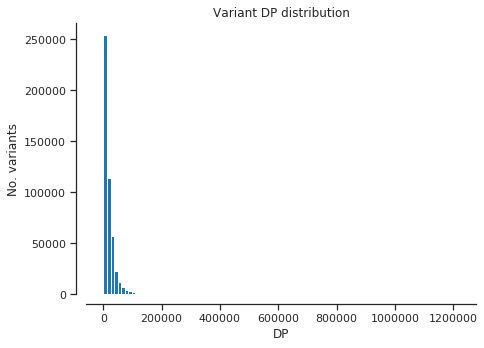

In [12]:
plot_variant_hist('DP', bins=100)

/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


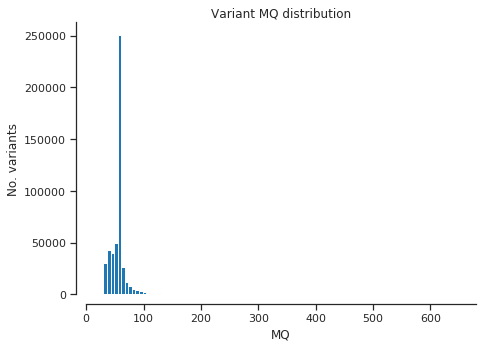

In [13]:
plot_variant_hist('MQ', bins=100)

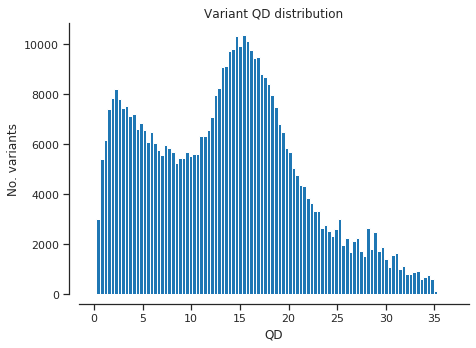

In [14]:
plot_variant_hist('QD', bins=100)

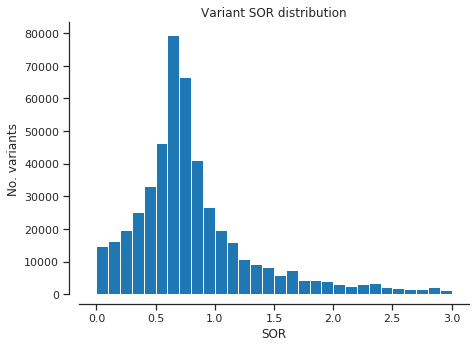

In [15]:
plot_variant_hist('SOR')

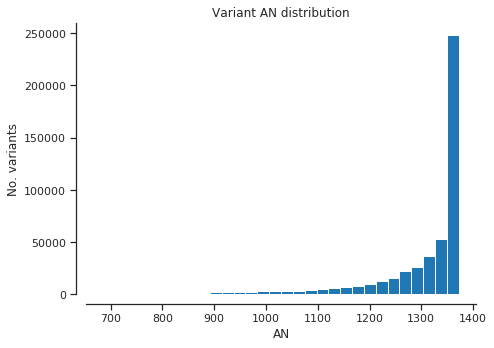

In [16]:
plot_variant_hist('AN')

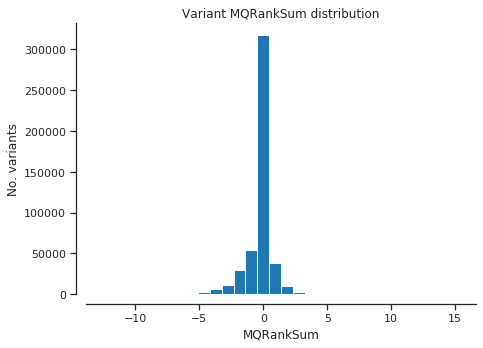

In [17]:
plot_variant_hist('MQRankSum')

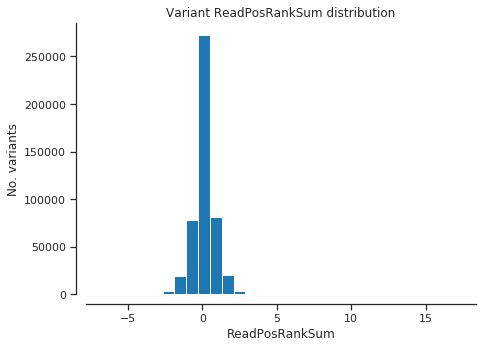

In [18]:
plot_variant_hist('ReadPosRankSum')

In [19]:
calldata = callset['calldata']

In [20]:
genotypes = allel.GenotypeChunkedArray(calldata['GT'])
genotypes

<GenotypeChunkedArray shape=(483348, 686, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=632.4M cbytes=56.4M cratio=11.2
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [21]:
samples_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Fagus/samples_Fsylvatica_GM_v2_RENAMED.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples.head()

,ID,Population
0,AT_FS_13_04,AT_FS_13
1,AT_FS_13_05,AT_FS_13
2,AT_FS_13_06,AT_FS_13
3,AT_FS_13_07,AT_FS_13
4,AT_FS_13_10,AT_FS_13


In [22]:
samples.Population.value_counts()

FR_FS_5     25
IT_FS_8     25
GB_FS_19    25
FR_FS_6     25
NO_FS_21    25
AT_FS_13    25
NO_FS_22    25
IT_FS_7     25
FR_FS_4     25
SE_FS_24    25
DE_FS_16    25
FR_FS_3     25
ES_FS_2     25
SE_FS_23    25
ES_FS_1     25
GR_FS_10    25
GB_FS_20    25
DE_FS_18    25
GR_FS_9     24
AT_FS_14    24
SI_FS_28    24
DE_FS_15    24
CH_FS_12    24
DE_FS_17    24
CH_FS_11    24
SI_FS_26    23
SI_FS_25    23
SI_FS_27    22
Name: Population, dtype: int64

In [23]:
ac = genotypes.count_alleles()
ac

<AlleleCountsChunkedArray shape=(483348, 2) dtype=int32 chunks=(60419, 2)
   nbytes=3.7M cbytes=1.3M cratio=2.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [24]:
n_variants = len(genotypes)
n_variants

483348

In [25]:
pc_missing = genotypes.count_missing(axis=0)[:] * 100 / n_variants
pc_het = genotypes.count_het(axis=0)[:] * 100 / n_variants
#pc_missing

In [26]:
populations = samples.Population.unique()

In [27]:
samples.Population.unique()

array(['AT_FS_13', 'AT_FS_14', 'CH_FS_11', 'CH_FS_12', 'DE_FS_15',
       'DE_FS_16', 'DE_FS_17', 'DE_FS_18', 'ES_FS_1', 'ES_FS_2',
       'FR_FS_3', 'FR_FS_4', 'FR_FS_5', 'FR_FS_6', 'GB_FS_19', 'GB_FS_20',
       'GR_FS_9', 'GR_FS_10', 'IT_FS_7', 'IT_FS_8', 'NO_FS_21',
       'NO_FS_22', 'SE_FS_23', 'SE_FS_24', 'SI_FS_25', 'SI_FS_26',
       'SI_FS_27', 'SI_FS_28'], dtype=object)

In [33]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 32)
    pop2color = {'AT_FS_13': palette[17],
                 'AT_FS_14': palette[18],
                 'CH_FS_11': palette[2],
                 'CH_FS_12': palette[3],
                 'DE_FS_15': palette[4],
                 'DE_FS_16': palette[5],
                 'DE_FS_17': palette[6],
                 'DE_FS_18': palette[7],
                 'ES_FS_1': palette[8],
                 'ES_FS_2': palette[9],
                 'FR_FS_3': palette[10],
                 'FR_FS_4': palette[11],
                 'FR_FS_5': palette[12],
                 'FR_FS_6': palette[13],
                 'GB_FS_19': palette[15],
                 'GB_FS_20': palette[16],
                 'GR_FS_9': palette[0],
                 'GR_FS_10': palette[1],
                 'IT_FS_7': palette[19],
                 'IT_FS_8': palette[20],
                 'NO_FS_21': palette[21],
                 'NO_FS_22': palette[22],
                 'SE_FS_23': palette[23],
                 'SE_FS_24': palette[20],
                 'SI_FS_25': palette[28],
                 'SI_FS_26': palette[29],
                 'SI_FS_27': palette[30],
                 'SI_FS_28': palette[31],}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[17]),
               mpl.patches.Patch(color=palette[18]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[15]),
               mpl.patches.Patch(color=palette[16]),
               mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[19]),
               mpl.patches.Patch(color=palette[20]),
               mpl.patches.Patch(color=palette[21]),
               mpl.patches.Patch(color=palette[22]),
               mpl.patches.Patch(color=palette[23]),
               mpl.patches.Patch(color=palette[20]),
               mpl.patches.Patch(color=palette[28]),
               mpl.patches.Patch(color=palette[29]),
               mpl.patches.Patch(color=palette[30]),
               mpl.patches.Patch(color=palette[31])]
    ax.legend(handles=handles, labels=['AT_FS_13', 'AT_FS_14', 'CH_FS_11', 'CH_FS_12', 'DE_FS_15',
       'DE_FS_16', 'DE_FS_17', 'DE_FS_18', 'ES_FS_1', 'ES_FS_2',
       'FR_FS_3', 'FR_FS_4', 'FR_FS_5', 'FR_FS_6', 'GB_FS_19', 'GB_FS_20',
       'GR_FS_9', 'GR_FS_10', 'IT_FS_7', 'IT_FS_8', 'NO_FS_21',
       'NO_FS_22', 'SE_FS_23', 'SE_FS_24', 'SI_FS_25', 'SI_FS_26',
       'SI_FS_27', 'SI_FS_28'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

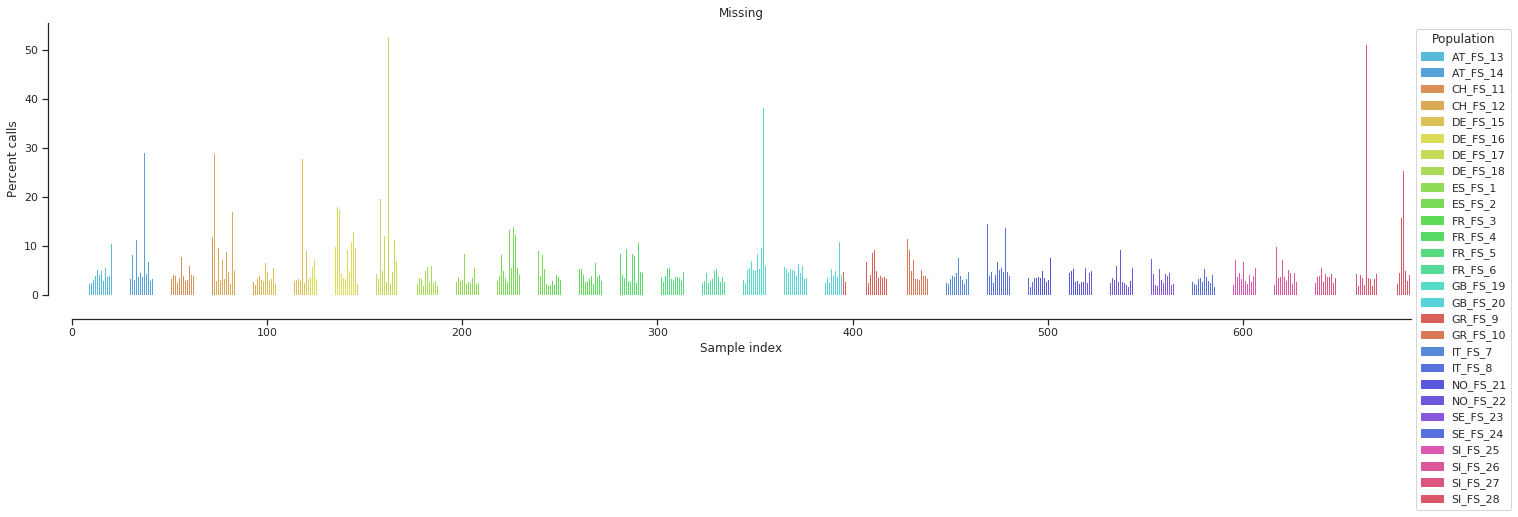

In [34]:
plot_genotype_frequency(pc_missing, 'Missing')

In [35]:
np.argsort(pc_missing)[-1]

162

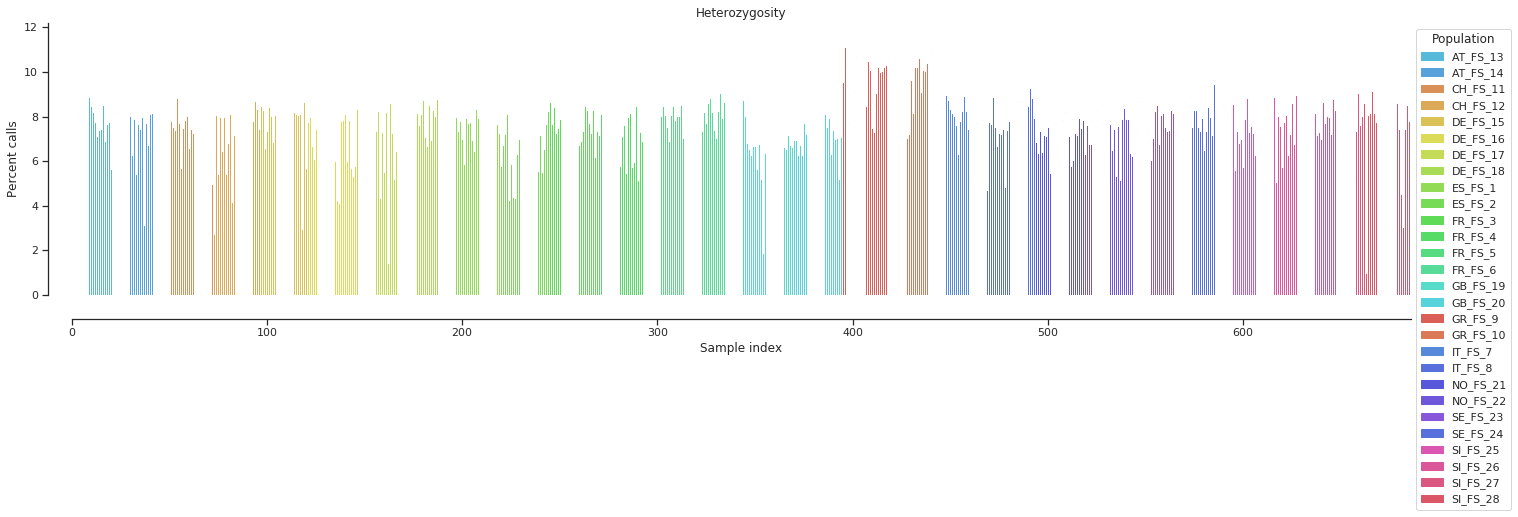

In [36]:
plot_genotype_frequency(pc_het, 'Heterozygosity')
plt.savefig('/wrk/Gen_Tree/Fagus_sylvatica/Heterozygosity')

In [37]:
palette = sns.color_palette("hls", 45)
pop_colours = {'AT_FS_13': palette[17],
                 'AT_FS_14': palette[18],
                 'CH_FS_11': palette[2],
                 'CH_FS_12': palette[3],
                 'DE_FS_15': palette[4],
                 'DE_FS_16': palette[5],
                 'DE_FS_17': palette[6],
                 'DE_FS_18': palette[7],
                 'ES_FS_1': palette[8],
                 'ES_FS_2': palette[9],
                 'FR_FS_3': palette[10],
                 'FR_FS_4': palette[11],
                 'FR_FS_5': palette[12],
                 'FR_FS_6': palette[13],
                 'GB_FS_19': palette[15],
                 'GB_FS_20': palette[16],
                 'GR_FS_9': palette[0],
                 'GR_FS_10': palette[1],
                 'IT_FS_7': palette[19],
                 'IT_FS_8': palette[20],
                 'NO_FS_21': palette[21],
                 'NO_FS_22': palette[22],
                 'SE_FS_23': palette[23],
                 'SE_FS_24': palette[24],
                 'SI_FS_25': palette[28],
                 'SI_FS_26': palette[29],
                 'SI_FS_27': palette[30],
                 'SI_FS_28': palette[31]}

In [38]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    
def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=0.97)

In [39]:
flt = (ac[:, :2].min(axis=1) > 1)
gf = genotypes.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(402977, 686) dtype=int8 chunks=(1575, 686)
   nbytes=263.6M cbytes=50.3M cratio=5.2
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [40]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

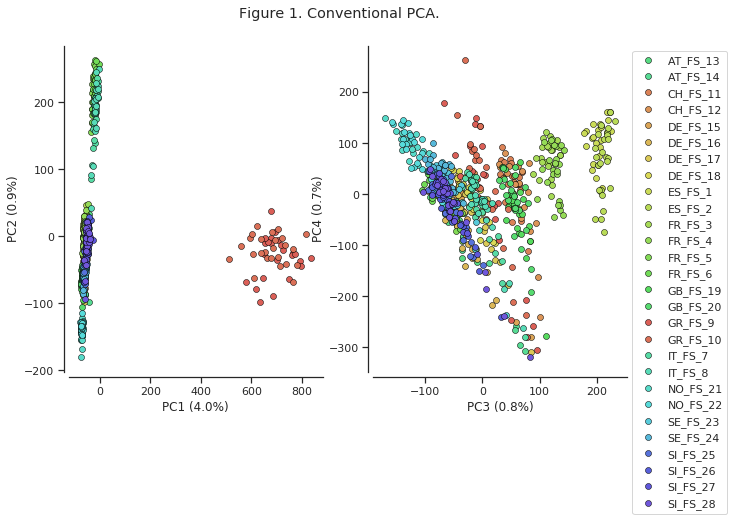

In [41]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')
plt.savefig('/wrk/Gen_Tree/Fagus_sylvatica/PCA_1')